In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
processed_dir = '/content/drive/MyDrive/DAISY-Project/datasets/processed'
classes = ['mel', 'bcc', 'nv', 'bkl', 'akiec']
for cls in classes:
    cls_dir = os.path.join(processed_dir, cls)
    print(f"{cls}: {len(os.listdir(cls_dir))} images")

In [ ]:
import cv2
import numpy as np
import os
import shutil

# Define paths
processed_dir = '/content/drive/MyDrive/DAISY-Project/datasets/processed'
split_base = '/content/drive/MyDrive/DAISY-Project/datasets/split'
train_dir = os.path.join(split_base, 'train')
val_dir = os.path.join(split_base, 'val')
test_dir = os.path.join(split_base, 'test')

# Create split directories
for split in [train_dir, val_dir, test_dir]:
    for cls in ['mel', 'bcc', 'nv', 'bkl', 'akiec']:
        os.makedirs(os.path.join(split, cls), exist_ok=True)

# Resize and split
for cls in ['mel', 'bcc', 'nv', 'bkl', 'akiec']:
    cls_dir = os.path.join(processed_dir, cls)
    images = os.listdir(cls_dir)
    np.random.shuffle(images)  # Randomize for splitting
    n = len(images)
    n_train = int(0.7 * n)
    n_val = int(0.2 * n)
    n_test = n - n_train - n_val  # Ensure all images are used

    print(f"{cls}: Total={n}, Train={n_train}, Val={n_val}, Test={n_test}")

    for i, img in enumerate(images):
        src = os.path.join(cls_dir, img)
        img_data = cv2.imread(src)
        if img_data is None:
            print(f"Warning: Failed to load {src}")
            continue
        img_resized = cv2.resize(img_data, (224, 224))
        if i < n_train:
            dst = os.path.join(train_dir, cls, img)
        elif i < n_train + n_val:
            dst = os.path.join(val_dir, cls, img)
        else:
            dst = os.path.join(test_dir, cls, img)
        cv2.imwrite(dst, img_resized)

print("Resize and split complete")

In [ ]:
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(split_base, split)
    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)
        print(f"{split}/{cls}: {len(os.listdir(cls_dir))} images")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1️⃣ Augmentation for TRAIN
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# 2️⃣ No Augmentation for VAL/TEST (only normalize)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 3️⃣ Load images from directory (generators)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("✅ Generators ready!")
print("Class indices:", train_generator.class_indices)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


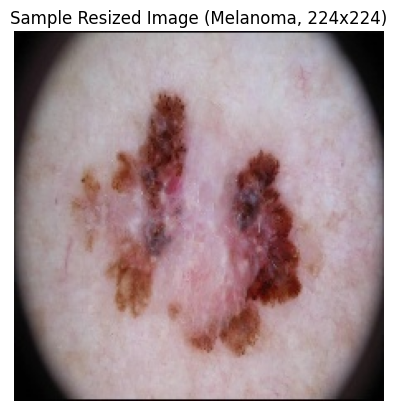

Shape: (224, 224, 3)


In [7]:
import matplotlib.pyplot as plt
import cv2

sample_img = '/content/drive/MyDrive/DAISY-Project/datasets/split/train/mel/ISIC_0000031.jpg'
img = cv2.imread(sample_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Sample Resized Image (Melanoma, 224x224)")
plt.axis('off')
plt.show()
print("Shape:", img.shape)  # Expected: (224, 224, 3)